In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #overiding matplotlib with sns

In [2]:
df = pd.read_csv(r"C:\Users\sudis\Downloads\walmart_files\Walmart DataSet\Walmart DataSet.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.columns = [col.lower() for col in df.columns]
df.head(10)

C:\Users\sudis\AppData\Local\Temp\ipykernel_1800\3196030734.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
2010-12-03,1,1439541.59,0,57.79,2.667,211.380643,8.106
2010-03-19,1,1472515.79,0,54.58,2.720,211.215635,8.106
2010-03-26,1,1404429.92,0,51.45,2.732,211.018042,8.106
2010-02-04,1,1594968.28,0,62.27,2.719,210.820450,7.808


In [3]:
df.tail(10)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
Date,,,,,,,
2012-08-24,45,718232.26,0,72.62,3.834,191.344887,8.684
2012-08-31,45,734297.87,0,75.09,3.867,191.461281,8.684
2012-07-09,45,766512.66,1,75.70,3.911,191.577676,8.684
2012-09-14,45,702238.27,0,67.87,3.948,191.699850,8.684
2012-09-21,45,723086.20,0,65.32,4.038,191.856704,8.684
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667
2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667


Data Wrangling

In [4]:
df.shape

(6435, 7)

In [5]:
df.columns

Index(['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'cpi', 'unemployment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int64  
 3   temperature   6435 non-null   float64
 4   fuel_price    6435 non-null   float64
 5   cpi           6435 non-null   float64
 6   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [7]:
df.describe(include = "all")

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.duplicated().sum()

0

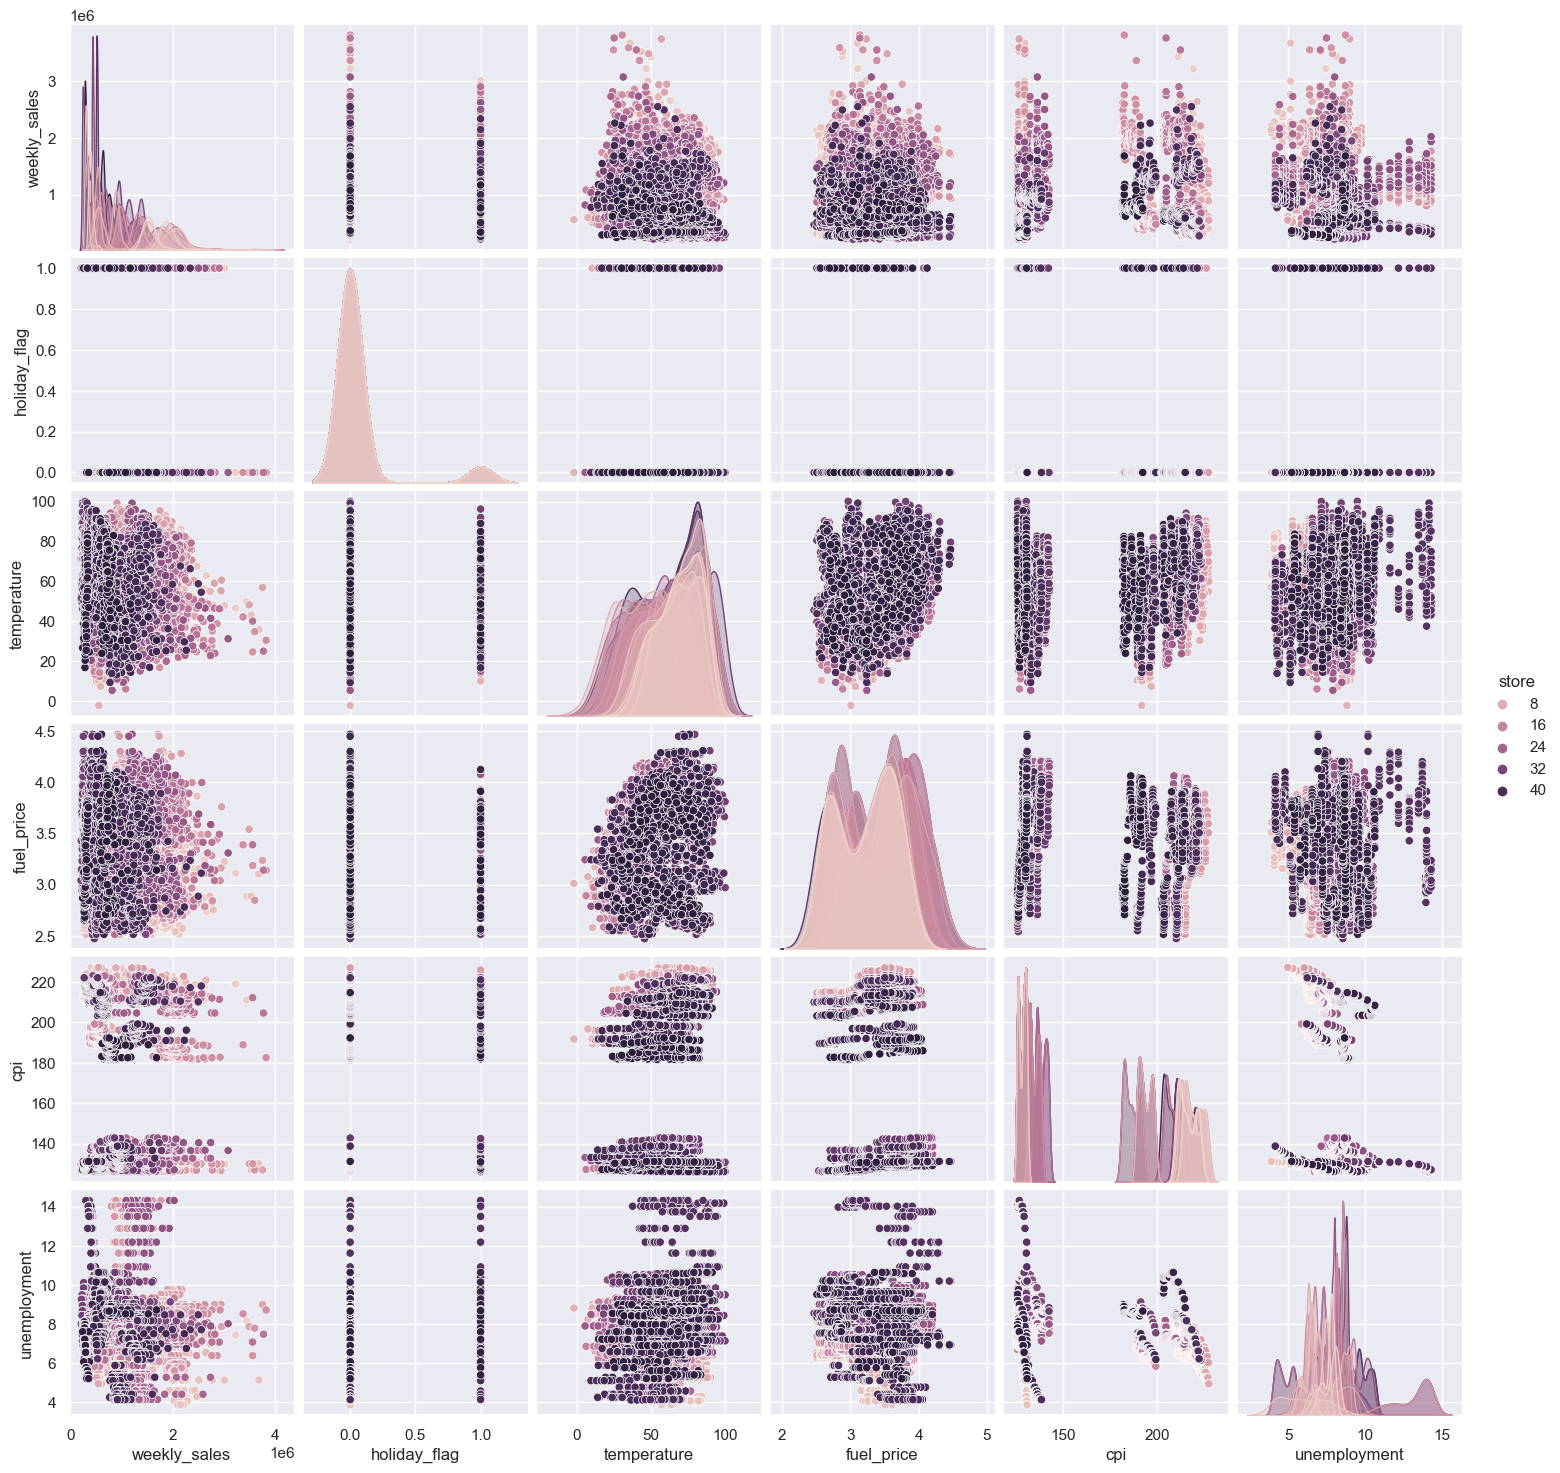

In [9]:
sns.pairplot(df, hue = "store")

1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights that can give them a clear perspective on the following:

a) If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most?

<Axes: >

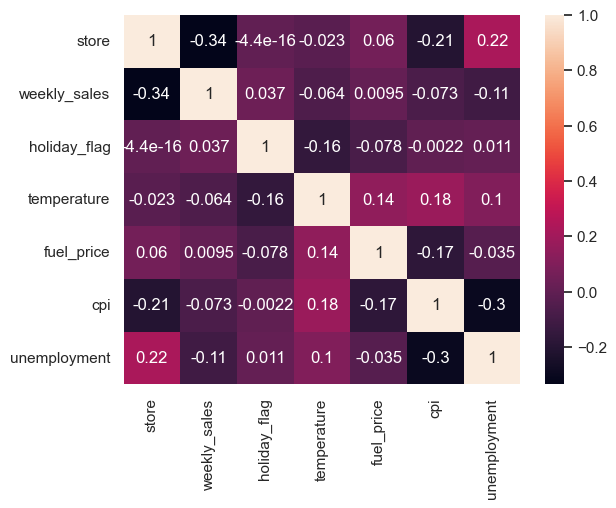

In [10]:
corr = df.corr()
sns.heatmap(data = corr, annot = True)

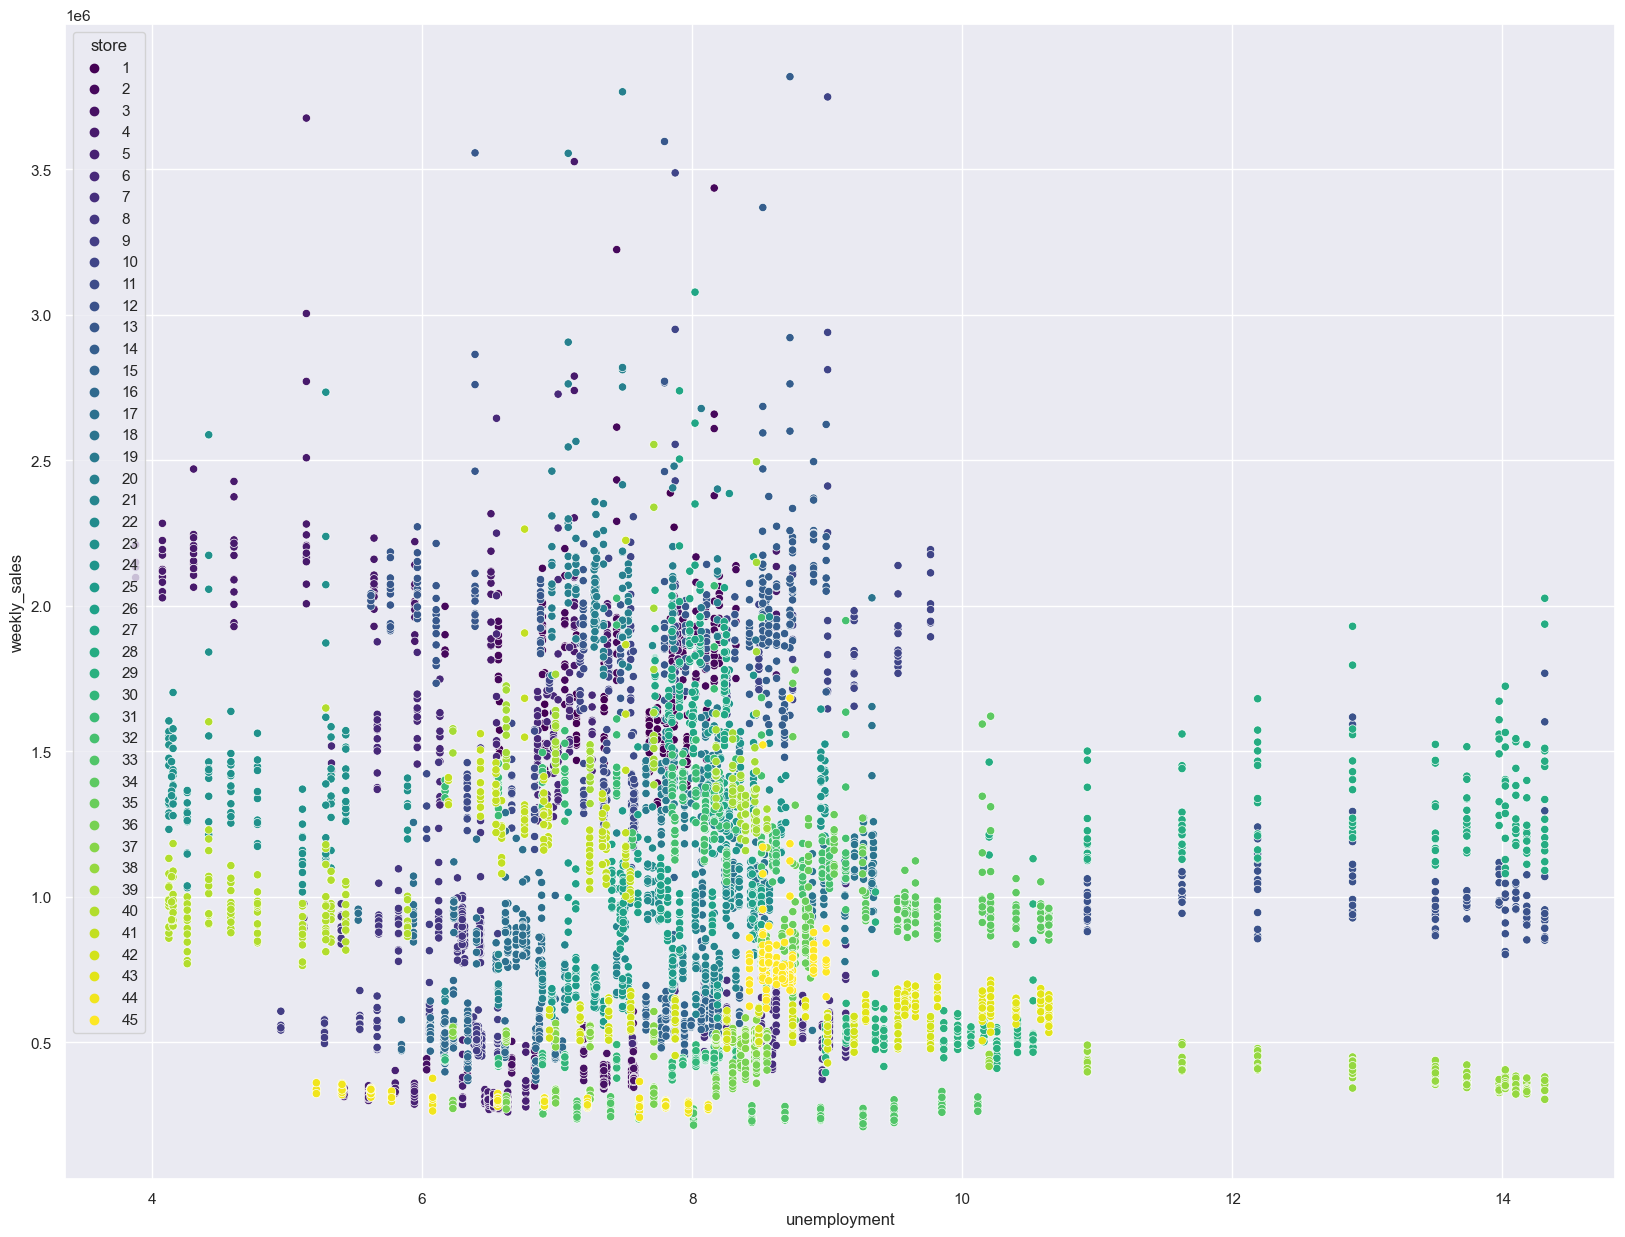

In [11]:
plt.figure(figsize = (20,15))
sns.scatterplot(x = "unemployment", y = "weekly_sales", data = df, hue = "store", palette='viridis', legend='full')
plt.show()

In [12]:
# Calculate the correlation coefficient between Unemployment and Weekly Sales for each store
# and sort the stores by the strength of the correlation
store_correlations = df.groupby('store').apply(lambda x: x['weekly_sales'].corr(x['unemployment']))
store_correlations = store_correlations.reset_index(name='Correlation')
store_correlations.sort_values(by='Correlation', ascending=True, inplace=True)

# Display the stores with the strongest Negative correlation
print(store_correlations.head())

    store  Correlation
37     38    -0.785290
43     44    -0.780076
38     39    -0.384681
41     42    -0.356355
40     41    -0.350630


ANSWER 1) when we look into the correlation coefficent we can find that the there is a -0.11 relation between unemployment and sales. thus we can conclude that when ever uneployment increases there is a slighlt fall in weekly sales of stores. Hovever when we are look into data minutly we can find that there are some stores particularly store number 38 and 44, these stores are located in the area where sales very highly depended on the Unemployment rate.


** QUESTION 2: If the weekly sales show a seasonal trend, when and what could be the reason?**

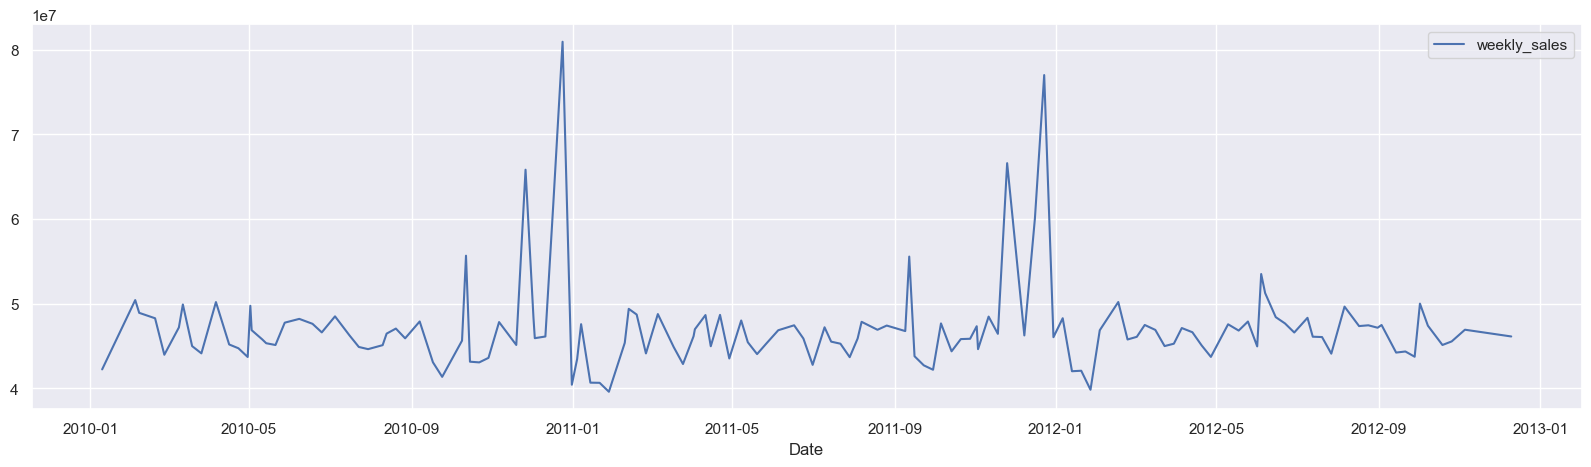

In [13]:
df_1 = df.groupby("Date")["weekly_sales"].sum()
df_1 = df_1.reset_index()
df_1 = df_1.set_index("Date")
plt.figure(figsize = (20,5))
sns.lineplot(data = df_1)
plt.show()

Figure(640x480)


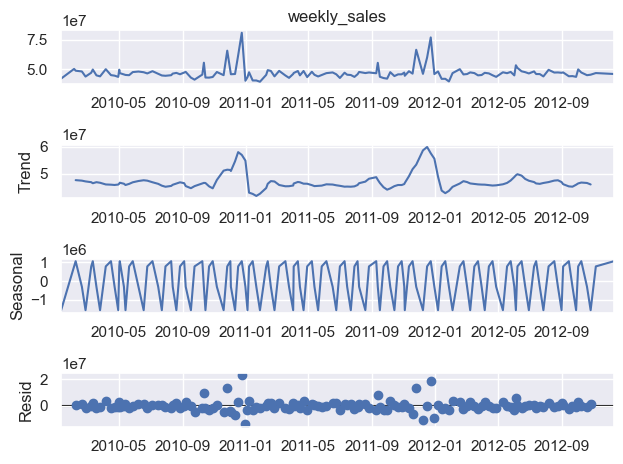

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_1["weekly_sales"], period = 4)
print(decomposition.plot())

ANSWER 2) Yes, there is a seasonal trend in weekly sales data of sthe stores, people generally buys more in the beginning of the month or the first week of the month and there after the sales decine. it may be because people buy there monthly groceries in the begining of the month and then after the sales gradully decline. however it must be noted that decline is not very high i.e. there are footfalls through out the month for daily needs.

 QUESTION C. Does temperature affect the weekly sales in any manner?

<Axes: >

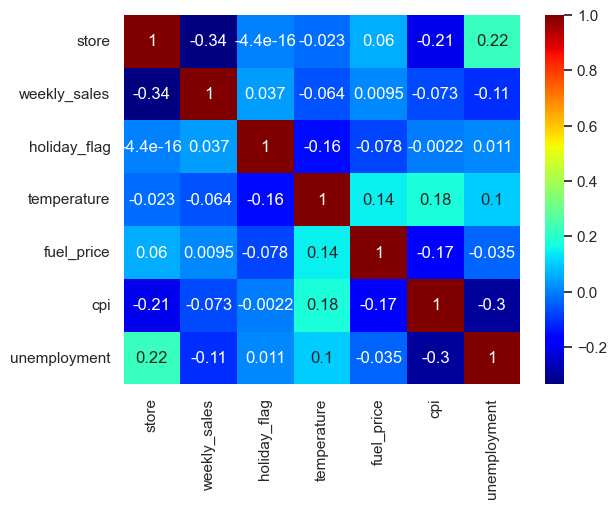

In [15]:
corr = df.corr()
sns.heatmap(data = corr, cmap = "jet", annot = True)

ANSWER 3: There is a very small relation between temperature and weekly sales in the data. There is a negative relation of -0.064. it means that when there is fall in temperature the weekly sales from the stores decline.

QUESTION 4) How is the Consumer Price index affecting the weekly sales of various stores?

<Axes: >

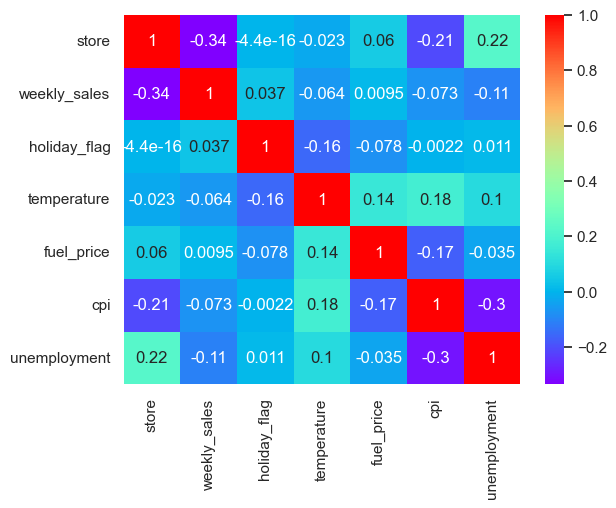

In [16]:
corr = df.corr()
sns.heatmap(data = corr, cmap = "rainbow", annot = True)

ANSWER 4) There is a very slight negative relation between consumer price index and sales, the correlation between the cpi and sales is around -0.073. Thus it means that when there is a price rise then there is a fall in sales.

QUESTION 5) Top performing stores according to the historical data

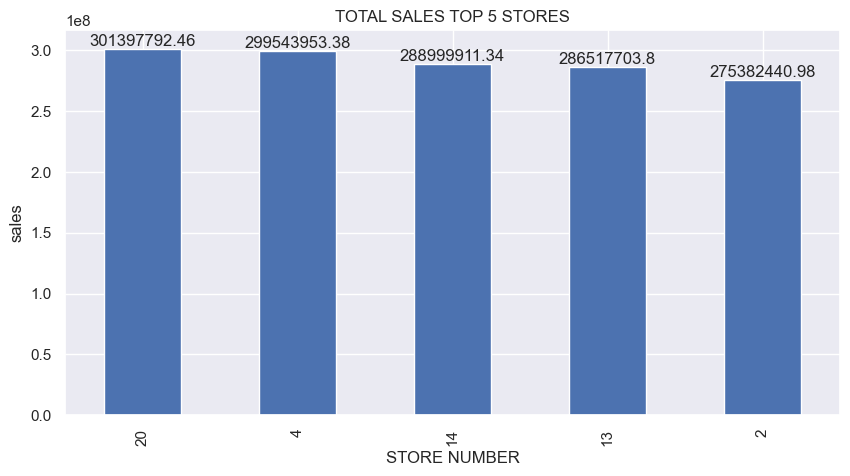

In [17]:
total_sales_summary = df.groupby("store")["weekly_sales"].sum().sort_values(ascending = False).head(5)
plt.figure(figsize =(10,5))
total_sales_summary.plot(kind = "bar")
plt.title("TOTAL SALES TOP 5 STORES")
plt.xlabel("STORE NUMBER")
plt.ylabel("sales")

for index, value in enumerate(total_sales_summary):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

ANSWER 5) Historically sales data shows that store number 20 is the best performing store.

QUESTION 6) The worst performing store, and how significant is the difference between the
 highest and lowest performing stores

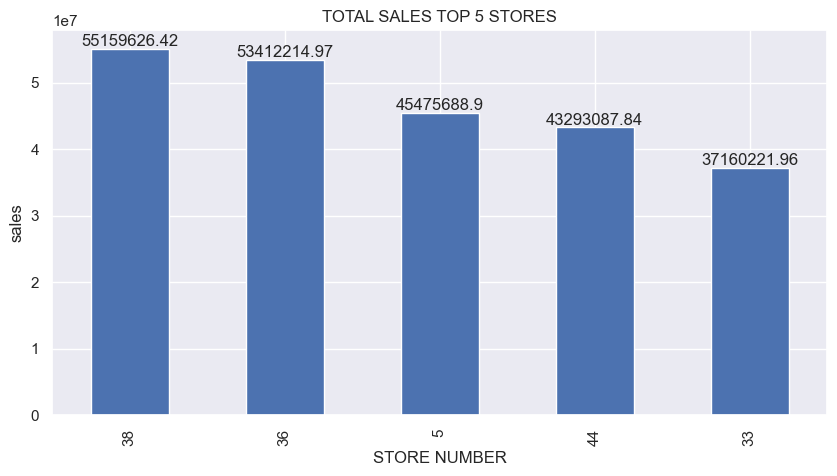

In [18]:
total_sales_summary = df.groupby("store")["weekly_sales"].sum().sort_values(ascending = False).tail(5)
plt.figure(figsize =(10,5))
total_sales_summary.plot(kind = "bar")
plt.title("TOTAL SALES TOP 5 STORES")
plt.xlabel("STORE NUMBER")
plt.ylabel("sales")

for index, value in enumerate(total_sales_summary):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.show()

ANSWER 6) from the above data we can find out that store number 33 is the worst performing store.

READING DATA ONCE MORE FOR PREDICTION

In [19]:
data = pd.read_csv(r"C:\Users\sudis\Downloads\walmart_files\Walmart DataSet\Walmart DataSet.csv")
data["Date"] = pd.to_datetime(data["Date"])
data.columns = [col.lower() for col in data.columns]
data =  data.set_index("date")
data.head(10)

C:\Users\sudis\AppData\Local\Temp\ipykernel_1800\1516200103.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
2010-12-03,1,1439541.59,0,57.79,2.667,211.380643,8.106
2010-03-19,1,1472515.79,0,54.58,2.720,211.215635,8.106
2010-03-26,1,1404429.92,0,51.45,2.732,211.018042,8.106
2010-02-04,1,1594968.28,0,62.27,2.719,210.820450,7.808


SELECTING A STORE TO PREDICT SALES FORCASTING

In [77]:
sales = int(input("Select the store for time series predicton (store number 1 to 45): "))
st = data[data["store"] == sales]
df1 = pd.DataFrame(st.weekly_sales.groupby(store.index).sum())
df1.reset_index(inplace = True)
df1["date"] = pd.to_datetime(df1["date"])
df1.set_index("date", inplace = True)

Select the store for time series predicton (store number 1 to 45): 3


In [82]:
acf_values,confidence_intervals=sm.tsa.acf(df1.dropna(),nlags=20,alpha=0.05)
pacf_values=sm.tsa.pacf(df1.dropna(),nlags=20)
significant_acf = []
significant_pacf = []
for lag,acf,confident in zip(range(len(acf_values)),acf_values,confidence_intervals):
    if(abs(acf)>confident[1]):
        significant_acf.append(acf)
    else:
        break
for lag,pacf,confident in zip(range(len(pacf_values)),pacf_values,confidence_intervals):
    if(abs(acf)>confident[1]):
        significant_pacf.append(acf)
    else:
        break
p=len(significant_acf)
q=len(significant_pacf)

In [88]:
train = df1.iloc[:116]['weekly_sales']
test = df1.iloc[117:]['weekly_sales']
print(train.shape)
print(test.shape)

(116,)
(26,)


In [92]:
train=df1[:round(len(df1)*0.7)]
model=SARIMAX(train,order=(p,1,q),seasonal_order=(p,1,q,52))
model_fit=model.fit()
pred=model_fit.predict(start=len(train),end=len(df1)-1,dynamic=True)
forecast=model_fit.forecast(steps=12)

C:\Users\sudis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sudis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sudis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sudis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


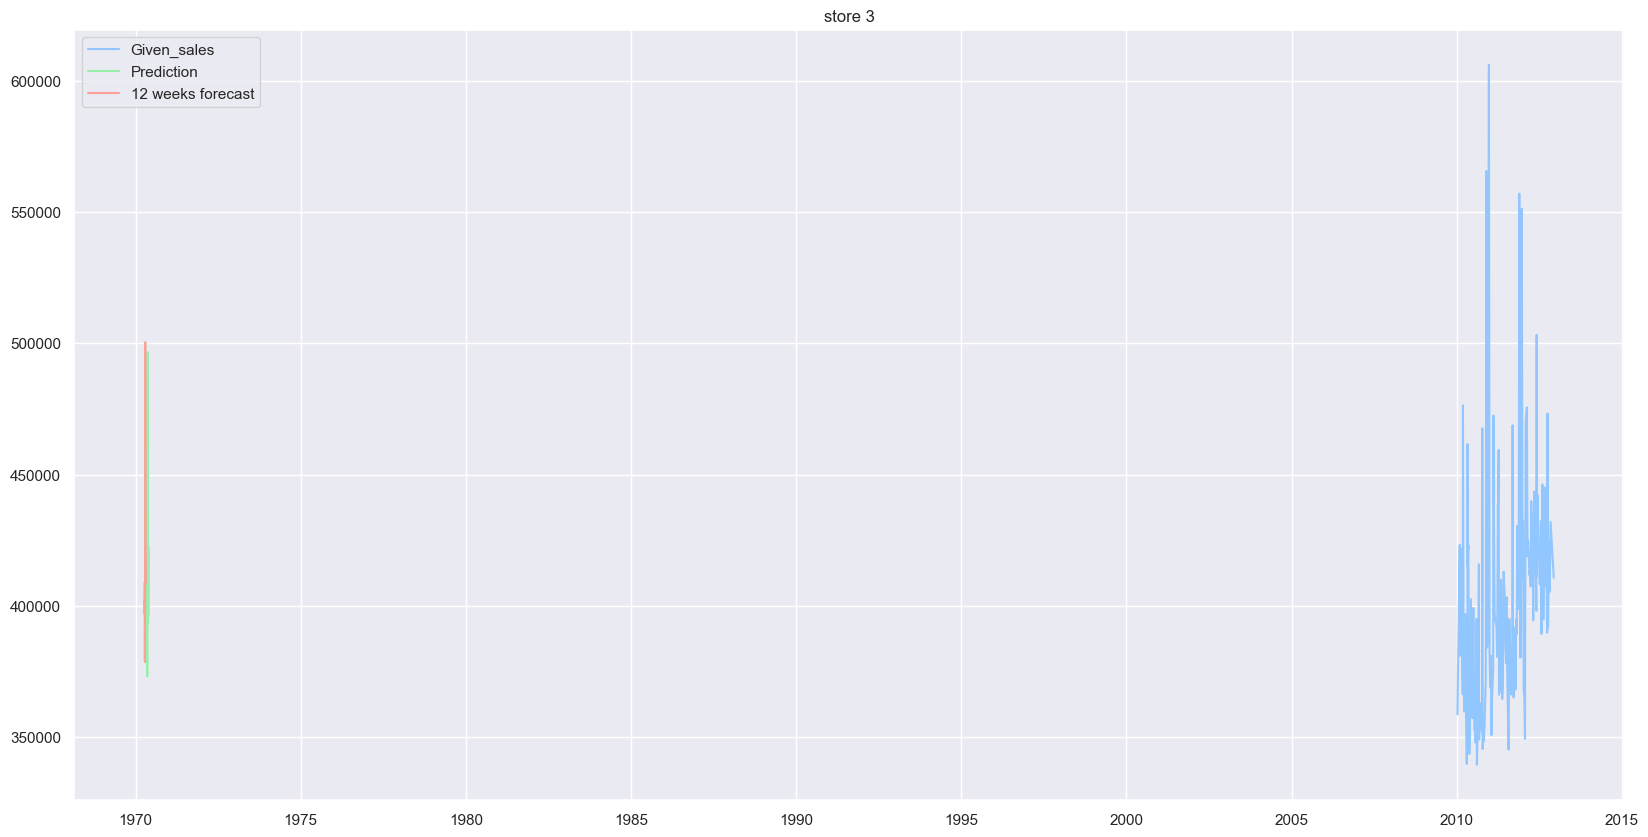

In [96]:
plt.figure(figsize=(20,10))
plt.plot(df1['weekly_sales'],label='Given_sales')
plt.plot(pred,label='Prediction')
plt.plot(forecast,label="12 weeks forecast")
plt.legend()
plt.title(f'store {sales}')
plt.show()

from statsmodels.graphic.tsaplots import

In [ ]:
for i in range(1,46):
    new_data=pd.DataFrame(df[df["Store"]==i]["Weekly_Sales"])
    lag52=pd.DataFrame(new_data["Weekly_Sales"].diff(52))
    acf_values,confidence_intervals=sm.tsa.acf(lag52.dropna(),nlags=20,alpha=0.05)
    pacf_values=sm.tsa.pacf(lag52.dropna(),nlags=20)
    significant_acf = []
    significant_pacf = []
    for lag,acf,confident in zip(range(len(acf_values)),acf_values,confidence_intervals):
        if(abs(acf)>confident[1]):
            significant_acf.append(acf)
        else:
            break
    for lag,pacf,confident in zip(range(len(pacf_values)),pacf_values,confidence_intervals):
        if(abs(acf)>confident[1]):
            significant_pacf.append(acf)
        else:
            break
    p=len(significant_acf)
    q=len(significant_pacf)
    train=new_data[:round(len(new_data)*0.7)]  plt.figure(figsize=(20,10))
    plt.plot(new_data['Weekly_Sales'],label='Given_sales')
    plt.plot(pred,label='Prediction')
    plt.plot(forecast,label="12 weeks forecast")
    plt.legend()
    plt.title(f'store {i}')
    plt.show()
    
    model=SARIMAX(train,order=(p,1,q),seasonal_order=(p,1,q,52))
    model_fit=model.fit()
    pred=model_fit.predict(start=len(train),end=len(new_data)-1,dynamic=True)
    forecast=model_fit.forecast(steps=12)
  
  